## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
#imports
import pandas as pd
import numpy as np

In [2]:
budget = pd.read_csv('zippedData/tn.movie_budgets.csv')

In [3]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
#change dates to datetime objects
budget['release_date'] = pd.to_datetime(budget['release_date'])

In [6]:
#remove commas from gross figures
budget = budget.replace(',','', regex=True)

In [7]:
#make this one line if possible
budget['production_budget']= budget['production_budget'].str[1:]
budget['domestic_gross'] = budget['domestic_gross'].str[1:]
budget['worldwide_gross'] = budget['worldwide_gross'].str[1:]

In [8]:
#convert production budget, domestic gross, and worldwide gross to integers from objects
budget[['production_budget', 'domestic_gross', 'worldwide_gross']] = budget[['production_budget', 'domestic_gross', 'worldwide_gross']].astype(np.int64)

In [9]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [10]:
#Create a new column to determine how much a movie made against its budget
budget["return_on_investment"]= budget['worldwide_gross']/budget['production_budget']

In [11]:
#Convert the release date to a date time format
budget['year'] = budget['release_date'].dt.year

In [12]:
#Filter by year after 2010
budget_recent = budget.loc[budget['year']>2010]

In [13]:
budget_recent['return_on_investment'].describe()

count    1920.000000
mean        3.285546
std        11.055955
min         0.000000
25%         0.200260
50%         1.613252
75%         3.635941
max       416.564740
Name: return_on_investment, dtype: float64

In [14]:
#Filter by return on investment greater than 2, considering these to be successful movies
success = budget_recent.loc[budget['return_on_investment']>2]

In [15]:
success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 1 to 5748
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    861 non-null    int64         
 1   release_date          861 non-null    datetime64[ns]
 2   movie                 861 non-null    object        
 3   production_budget     861 non-null    int64         
 4   domestic_gross        861 non-null    int64         
 5   worldwide_gross       861 non-null    int64         
 6   return_on_investment  861 non-null    float64       
 7   year                  861 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 60.5+ KB


In [16]:
#Export success df to .csv
success.to_csv("zippedData/success.csv")

### Merging the budget dataframe with the IMDB data pulled from SQL

In [17]:
#imports and connect to SQL
import pandas as pd
import sqlite3
import pandasql
import matplotlib.pyplot as plt


conn = sqlite3.connect('zippedData/im.db')

In [18]:
#creating a dataframe with the info we want to take from the imdb database
imdb_ratings = pd.read_sql(
    """
    SELECT basics.movie_id, basics.primary_title, basics.original_title, basics.runtime_minutes, basics.genres, ratings.averagerating, ratings.numvotes
    FROM movie_basics as basics
        JOIN movie_ratings as ratings
            USING(movie_id)
    """, conn
)

In [19]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.9+ MB


In [20]:
imdb_ratings

,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,NaN,None,6.6,5


In [21]:
#bring in csv that was cleaned with the movie budgets
budget_cleaned = pd.read_csv('zippedData/success.csv')

In [22]:
#removing duplicates from the movie title column in each dataframe before merging them
imdb_ratings = imdb_ratings.drop_duplicates(subset=['primary_title'])
budget_cleaned = budget_cleaned.drop_duplicates(subset=['movie'])

In [23]:
budget_cleaned

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year
0,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,2011
1,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,2015
2,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,4.153696,2017
3,5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,6.710167,2015
4,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,2018
...,...,...,...,...,...,...,...,...,...
856,5672,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,25.754942,2012
857,5679,80,2015-07-10,The Gallows,100000,22764410,41656474,416.564740,2015
858,5685,86,2017-07-07,A Ghost Story,100000,1594798,2769782,27.697820,2017
859,5737,38,2016-03-18,Krisha,30000,144822,144822,4.827400,2016


In [24]:
imdb_ratings

,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,98.0,"Drama,Family",8.7,136


In [25]:
#merge imdb data with our movie budget data
all_movie_data = pd.merge(budget_cleaned, imdb_ratings, left_on='movie', right_on='primary_title', how='inner')

In [26]:
all_movie_data

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes
0,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624
1,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594
2,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926
3,8,9,2017-11-17,Justice League,300000000,229024295,655945209,2.186484,2017,tt0974015,Justice League,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135
4,9,10,2015-11-06,Spectre,300000000,200074175,879620923,2.932070,2015,tt2379713,Spectre,Spectre,148.0,"Action,Adventure,Thriller",6.8,352504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,5672,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,25.754942,2012,tt1742336,Your Sister's Sister,Your Sister's Sister,90.0,"Comedy,Drama",6.7,24780
726,5679,80,2015-07-10,The Gallows,100000,22764410,41656474,416.564740,2015,tt2309260,The Gallows,The Gallows,81.0,"Horror,Mystery,Thriller",4.2,17763
727,5685,86,2017-07-07,A Ghost Story,100000,1594798,2769782,27.697820,2017,tt6265828,A Ghost Story,A Ghost Story,92.0,"Drama,Fantasy,Romance",6.8,46280
728,5737,38,2016-03-18,Krisha,30000,144822,144822,4.827400,2016,tt4266638,Krisha,Krisha,83.0,Drama,7.2,5917


In [27]:
#Checking for duplicates of movie titles in our dataset that we will use going forward for analyses
all_movie_data['movie'].duplicated().value_counts()

False    730
Name: movie, dtype: int64

### Analysis of movie success depending on the month of the year, season

In [28]:
#import mathplotlib
import matplotlib.pyplot as plt

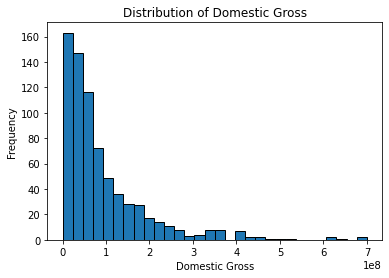

In [29]:
#Histogram of domestic gross
plt.hist(all_movie_data['domestic_gross'], bins=30, edgecolor='black')
plt.xlabel('Domestic Gross')
plt.ylabel('Frequency')
plt.title('Distribution of Domestic Gross')
plt.show()

In [30]:
#Create new column for month
all_movie_data['release_date'] = pd.to_datetime(all_movie_data['release_date'])
all_movie_data['release_month'] = all_movie_data['release_date'].dt.month

In [31]:
all_movie_data

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes,release_month
0,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624,5
1,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,5
2,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,4
3,8,9,2017-11-17,Justice League,300000000,229024295,655945209,2.186484,2017,tt0974015,Justice League,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135,11
4,9,10,2015-11-06,Spectre,300000000,200074175,879620923,2.932070,2015,tt2379713,Spectre,Spectre,148.0,"Action,Adventure,Thriller",6.8,352504,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,5672,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,25.754942,2012,tt1742336,Your Sister's Sister,Your Sister's Sister,90.0,"Comedy,Drama",6.7,24780,6
726,5679,80,2015-07-10,The Gallows,100000,22764410,41656474,416.564740,2015,tt2309260,The Gallows,The Gallows,81.0,"Horror,Mystery,Thriller",4.2,17763,7
727,5685,86,2017-07-07,A Ghost Story,100000,1594798,2769782,27.697820,2017,tt6265828,A Ghost Story,A Ghost Story,92.0,"Drama,Fantasy,Romance",6.8,46280,7
728,5737,38,2016-03-18,Krisha,30000,144822,144822,4.827400,2016,tt4266638,Krisha,Krisha,83.0,Drama,7.2,5917,3


#### Noticed a significant outlier, a movie called "The Gallows"

In [32]:
#The Gallows data
all_movie_data.loc[all_movie_data["movie"]=="The Gallows"]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes,release_month
726,5679,80,2015-07-10,The Gallows,100000,22764410,41656474,416.56474,2015,tt2309260,The Gallows,The Gallows,81.0,"Horror,Mystery,Thriller",4.2,17763,7


In [33]:
#drop outlier before we do analysis
all_movie_data=all_movie_data.drop(labels=726, axis=0)

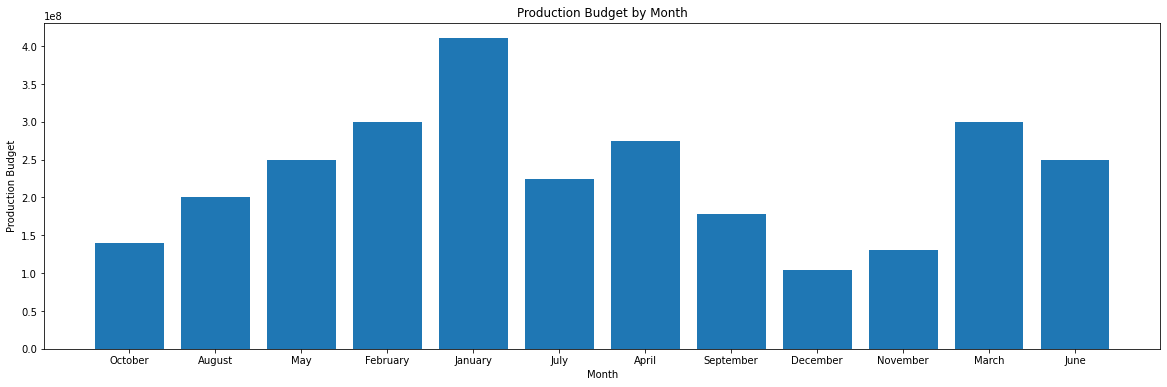

In [34]:
# Create the bar chart
plt.figure(figsize=(20, 6))
plt.bar(all_movie_data['release_month'], all_movie_data['production_budget'])

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Production Budget')
plt.title('Production Budget by Month')

# Customize the x-axis ticks with month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(all_movie_data['release_month'].unique(), month_names)

# Show the bar chart

plt.show()


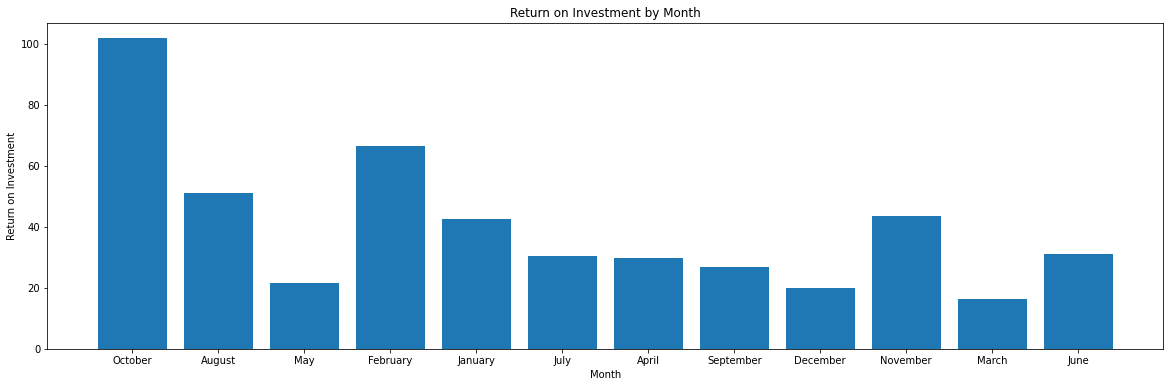

In [35]:
# Bar chart of return on investment by month
plt.figure(figsize=(20, 6))
plt.bar(all_movie_data['release_month'], all_movie_data['return_on_investment'])

plt.xlabel('Month')
plt.ylabel('Return on Investment')
plt.title('Return on Investment by Month')

# Customize the x-axis ticks with month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(all_movie_data['release_month'].unique(), month_names)


plt.show()

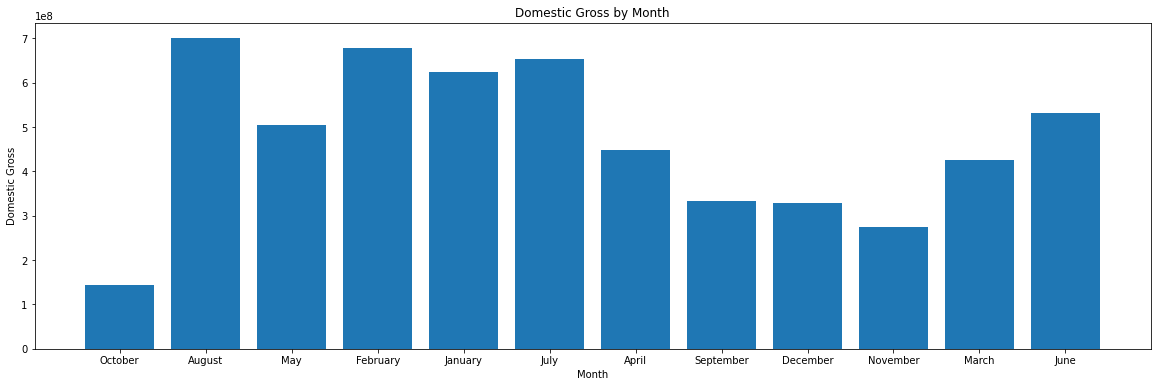

In [38]:
# Bar chart of domestic gross $ by month
plt.figure(figsize=(20, 6))
plt.bar(all_movie_data['release_month'], all_movie_data['domestic_gross'])

plt.xlabel('Month')
plt.ylabel('Domestic Gross')
plt.title('Domestic Gross by Month')

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(all_movie_data['release_month'].unique(), month_names)

plt.show()

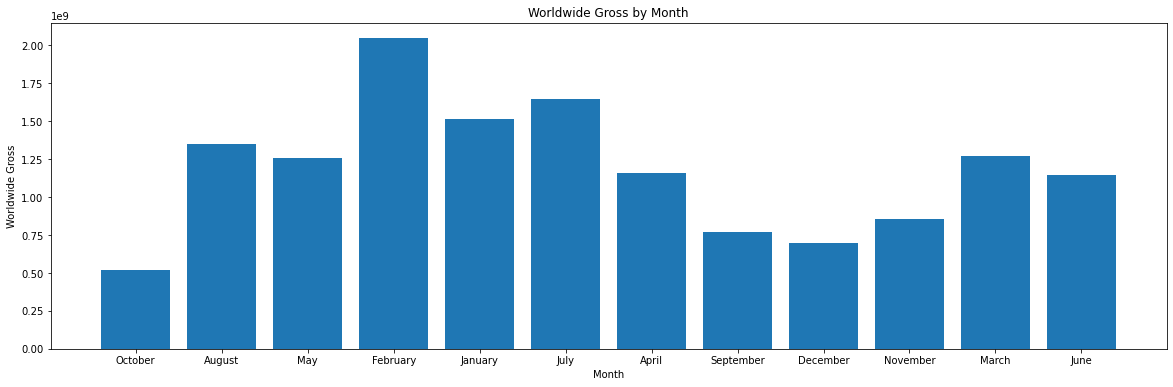

In [39]:
# Bar chart of domestic gross $ by month
plt.figure(figsize=(20, 6))
plt.bar(all_movie_data['release_month'], all_movie_data['worldwide_gross'])

plt.xlabel('Month')
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross by Month')

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(all_movie_data['release_month'].unique(), month_names)

plt.show()

In [37]:
all_movie_data.loc[all_movie_data["movie"]=="The Gallows"]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes,release_month


### We also wanted to look at how IMDB ratings related to the profits and return on investments for movies

In [ ]:
# Bar chart of domestic gross $ by month
plt.figure(figsize=(20, 6))
plt.bar(all_movie_data['release_month'], all_movie_data['worldwide_gross'])

plt.xlabel('Month')
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross by Month')

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(all_movie_data['release_month'].unique(), month_names)

plt.show()

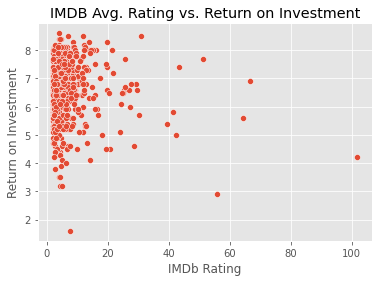

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create scatterplot
sns.scatterplot(x='return_on_investment', y='averagerating', data=all_movie_data)

#Set axis labels and title
plt.xlabel('IMDb Rating')
plt.ylabel('Return on Investment')
plt.title('IMDB Avg. Rating vs. Return on Investment')

plt.show()


In [47]:
#plotting imports
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

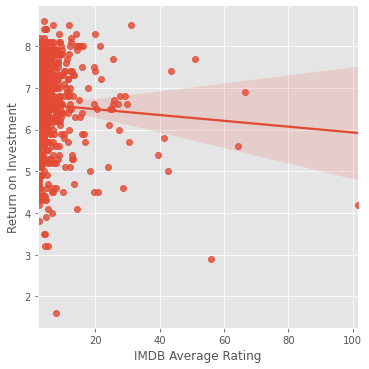

In [58]:
sns.lmplot(x='return_on_investment', y='averagerating', data=all_movie_data)

# Set the axis labels and title
plt.xlabel('IMDB Average Rating')
plt.ylabel('Return on Investment')
plt.title('')

# Show the plot
plt.show()